In [31]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Step 1: Set up Selenium with ChromeDriver
driver = webdriver.Chrome()  # Ensure ChromeDriver is installed and in PATH

# URL of the Amazon search page for "laptops"
url = 'https://www.amazon.com/s?k=laptops'

# Open the URL
driver.get(url)

# Store data in a list of dictionaries
product_data = []

# Loop through pages
while True:
    # Step 2: Wait for content to load
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@data-component-type="s-search-result"]')))
    
    # Step 3: Extract elements (e.g., product names, prices)
    products = driver.find_elements(By.XPATH, '//div[@data-component-type="s-search-result"]')

    # Loop through each product and extract the desired information
    for product in products:
        try:
            # Extract product name
            name = product.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]').text
        except:
            name = None
        
        try:
            # Extract product price
            price_whole = product.find_element(By.XPATH, './/span[@class="a-price-whole"]').text
        except:
            price_whole = None
        
        try:
            # Extract product price fraction
            price_fraction = product.find_element(By.XPATH, './/span[@class="a-price-fraction"]').text
        except:
            price_fraction = None
            
        # Combine whole and fractional prices
        price = f"{price_whole}.{price_fraction}" if price_whole and price_fraction else price_whole or price_fraction or None

        # Add product data to the list
        product_data.append({
            'Product Name': name,
            'Price Whole': price_whole,
            'Price Fraction': price_fraction,
            'Price': price,
        })

    # Try to find the "Next" button to go to the next page
    try:
        next_button = driver.find_element(By.XPATH, '//li[@class="a-last"]/a')
        if 'a-disabled' in next_button.get_attribute('class'):
            print("No more pages to scrape.")
            break
        next_button.click()
        time.sleep(2)  # Wait for the next page to load
    except Exception as e:
        print("No more pages to scrape or an error occurred:", str(e))
        break

# Step 4: Convert the data into a DataFrame and save it as a CSV
df = pd.DataFrame(product_data)
df.to_csv('amazon_laptops_data_all2.csv', index=False)

# Close the Selenium browser
driver.quit()

print('Data successfully saved to amazon_laptops_data_all.csv')


No more pages to scrape or an error occurred: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//li[@class="a-last"]/a"}
  (Session info: chrome=124.0.6367.79); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7108F1522+60802]
	(No symbol) [0x00007FF71086AC22]
	(No symbol) [0x00007FF710727CE4]
	(No symbol) [0x00007FF710776D4D]
	(No symbol) [0x00007FF710776E1C]
	(No symbol) [0x00007FF7107BCE37]
	(No symbol) [0x00007FF71079ABBF]
	(No symbol) [0x00007FF7107BA224]
	(No symbol) [0x00007FF71079A923]
	(No symbol) [0x00007FF710768FEC]
	(No symbol) [0x00007FF710769C21]
	GetHandleVerifier [0x00007FF710BF41BD+3217949]
	GetHandleVerifier [0x00007FF710C36157+3488183]
	GetHandleVerifier [0x00007FF710C2F0DF+3459391]
	GetHandleVerifier [0x00007FF7109AB8E6+823622]
	(No symbol) [0x00007FF710875FBF]
	(No symbol) [0x00007FF710870EE4]
	(No

In [11]:
import requests
import json
import pandas as pd

from textwrap import indent
username="shoaibanwar13"
url=f"https://api.github.com/users/{username}/repos"
response=requests.get(url)
if response.status_code==200:
  data=response.json()
  with open('gethub_repos.jason','w') as json_file:
    json.dump(data,json_file,indent=4)
  repo_data = [
        {
            'Repo Name': repo['name'],
            'Description': repo['description'],
            'Stars': repo['stargazers_count'],
            'Forks': repo['forks_count'],
            'Language': repo['language'],
            'URL': repo['html_url']
        }
        for repo in data
  ]

  df=pd.DataFrame(repo_data)
  df.to_csv('gethub_repos.csv',index=False)
  print('Data frame successfully saved to csv file')
  
else:
    print(f'Failed to retrieve data: {response.status_code}')

   




Data frame successfully saved to csv file


In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon_laptops_data_all.csv')

# Display the initial data
print("Initial Data:")
print(df.head())

# Step 1: Cleaning up missing values
# Fill missing values with 'Unknown' for string columns and 0 for numeric columns
df['Product Name'].fillna('Unknown', inplace=True)
df['Price Whole'].fillna('0', inplace=True)
df['Price Fraction'].fillna('0', inplace=True)

# Convert price columns to numeric
df['Price Whole'] = df['Price Whole'].astype(str).str.replace(',', '').astype(float)
df['Price Fraction'] = df['Price Fraction'].astype(str).str.replace(',', '').astype(float)

# Combine whole and fractional prices into a single price column
df['Price'] = df['Price Whole'] + df['Price Fraction'] / 100  # Assuming fraction is in cents

# Remove duplicates
df.drop_duplicates(subset=['Product Name'], keep='first', inplace=True)

# Display cleaned data
print("Cleaned Data:")
print(df.head())

# Save cleaned data to a new CSV
df.to_csv('cleaned_amazon_laptops_data.csv', index=False)


Initial Data:
                                        Product Name Price Whole  \
0  HP 17 Business Laptop, 17.3” HD+ Display, 11th...         NaN   
1  HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...         181   
2  HP 15.6" Portable Laptop (Include 1 Year Micro...         NaN   
3  HP Notebook Laptop, 15.6" HD Touchscreen, Inte...         427   
4  Dell Inspiron 3511 Laptop, 15.6" Full HD Touch...         501   

   Price Fraction Price  
0             NaN   NaN  
1             0.0   181  
2             NaN   NaN  
3             0.0   427  
4             0.0   501  
Cleaned Data:
                                        Product Name  Price Whole  \
0  HP 17 Business Laptop, 17.3” HD+ Display, 11th...          0.0   
1  HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...        181.0   
2  HP 15.6" Portable Laptop (Include 1 Year Micro...          0.0   
3  HP Notebook Laptop, 15.6" HD Touchscreen, Inte...        427.0   
4  Dell Inspiron 3511 Laptop, 15.6" Full HD Touch...        50

C:\Users\Jam Shoaib Anwar\AppData\Local\Temp\ipykernel_8692\274394617.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Name'].fillna('Unknown', inplace=True)
C:\Users\Jam Shoaib Anwar\AppData\Local\Temp\ipykernel_8692\274394617.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [39]:
# Analyze price trends
price_trends = df['Price'].describe()
print("\nPrice Trends:")
print(price_trends)

# Analyze keyword frequency
keyword_frequency = df['Product Name'].str.split(expand=True).stack().value_counts()
print("\nKeyword Frequency:")
print(keyword_frequency)

# Save analysis report
with open('analysis_report.txt', 'w') as f:
    f.write("Price Trends:\n")
    f.write(str(price_trends))
    f.write("\n\nKeyword Frequency:\n")
    f.write(str(keyword_frequency))



Price Trends:
count      21.000000
mean      266.802857
std       419.439113
min         0.000000
25%         0.000000
50%        26.200000
75%       326.990000
max      1552.800000
Name: Price, dtype: float64

Keyword Frequency:
Intel                  15
RAM,                   15
11                     12
Laptop                 11
Windows                11
                       ..
OS+HubxcelAccesory,     1
Abyss                   1
Blue                    1
2023                    1
Edition)                1
Name: count, Length: 250, dtype: int64


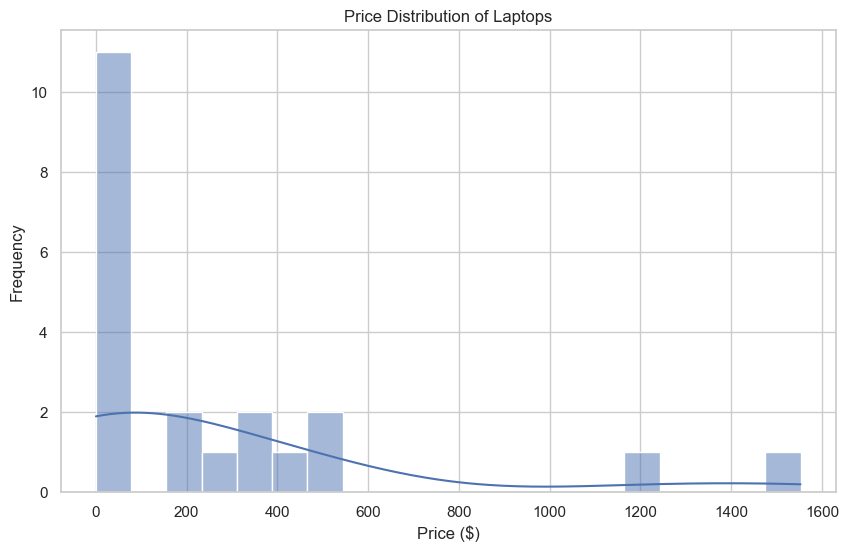

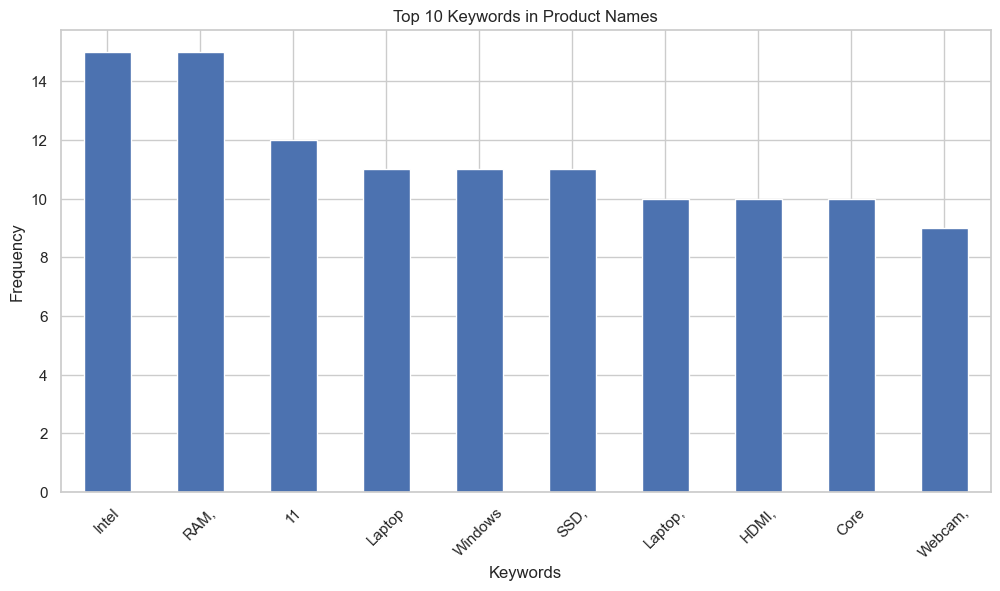

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution of Laptops')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()

# Visualize keyword frequency (top 10)
top_keywords = keyword_frequency.head(10)
plt.figure(figsize=(12, 6))
top_keywords.plot(kind='bar')
plt.title('Top 10 Keywords in Product Names')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('top_keywords_frequency.png')
plt.show()


In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
